# Task 1: Exploratory Data Analysis (EDA)
## Financial News Sentiment and Stock Price Analysis

### Descriptive Statistics

1) Import Packages

In [8]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print(" All packages imported successfully!")

 All packages imported successfully!


2) Load Data

In [9]:
# Load the news data
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {news_df.shape}")
print(f"Columns: {news_df.columns.tolist()}")
print("\nFirst 5 rows:")
news_df.head()

=== DATASET OVERVIEW ===
Dataset shape: (1407328, 6)
Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

First 5 rows:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## 3. Descriptive Statistics
### 3.1 Basic Statistics for Textual Lengths (Headline Length Analysis)

=== HEADLINE LENGTH STATISTICS ===
Average headline length: 73.12 characters
Shortest headline: 3 characters
Longest headline: 512 characters
Standard deviation: 40.74 characters


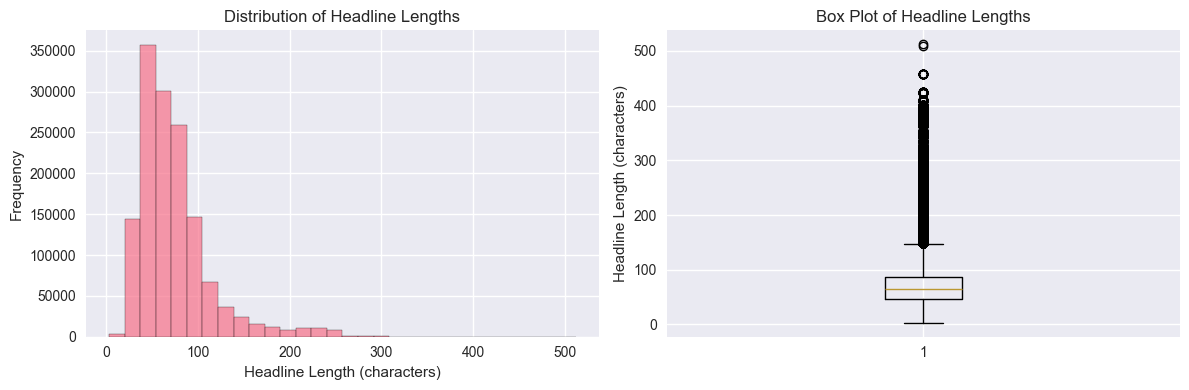


=== HEADLINE LENGTH EXAMPLES ===
Shortest headline: 'SPY'
Longest headline: 'JinkoSolar Tiger Pro Series Receives World's First IEC 61701 Ed. 3 (FDIS) Certification for Salt Mist Corrosion Standards JinkoSolar Holding Co., Ltd. (the "Company," or "JinkoSolar") (NYSE:JKS), one of the largest and most innovative solar module manufacturers in the world, today announced that its innovative Tiger Pro Series of high-efficiency modules received the world's first IEC 61701 Ed. 3 (FDIS) certification for salt mist corrosion test issued by TÜV Nord AG, an independent provider of technical ser'
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [6]:
# Calculate headline length statistics
news_df['headline_length'] = news_df['headline'].str.len()

print("=== HEADLINE LENGTH STATISTICS ===")
print(f"Average headline length: {news_df['headline_length'].mean():.2f} characters")
print(f"Shortest headline: {news_df['headline_length'].min()} characters")
print(f"Longest headline: {news_df['headline_length'].max()} characters")
print(f"Standard deviation: {news_df['headline_length'].std():.2f} characters")

# Create visualization
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(news_df['headline_length'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Headline Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')

# Box plot
plt.subplot(1, 2, 2)
plt.boxplot(news_df['headline_length'])
plt.ylabel('Headline Length (characters)')
plt.title('Box Plot of Headline Lengths')

plt.tight_layout()
plt.show()

# Show some example headlines by length
print("\n=== HEADLINE LENGTH EXAMPLES ===")
shortest = news_df.loc[news_df['headline_length'].idxmin(), 'headline']
longest = news_df.loc[news_df['headline_length'].idxmax(), 'headline']
print(f"Shortest headline: '{shortest}'")
print(f"Longest headline: '{longest}'")
print(news_df['headline_length'].describe())

3.2 Articles per Publisher Analysis

=== PUBLISHER ANALYSIS ===
Total unique publishers: 1034
Top 10 most active publishers:
1. Paul Quintaro: 228373 articles
2. Lisa Levin: 186979 articles
3. Benzinga Newsdesk: 150484 articles
4. Charles Gross: 96732 articles
5. Monica Gerson: 82380 articles
6. Eddie Staley: 57254 articles
7. Hal Lindon: 49047 articles
8. ETF Professor: 28489 articles
9. Juan Lopez: 28438 articles
10. Benzinga Staff: 28114 articles


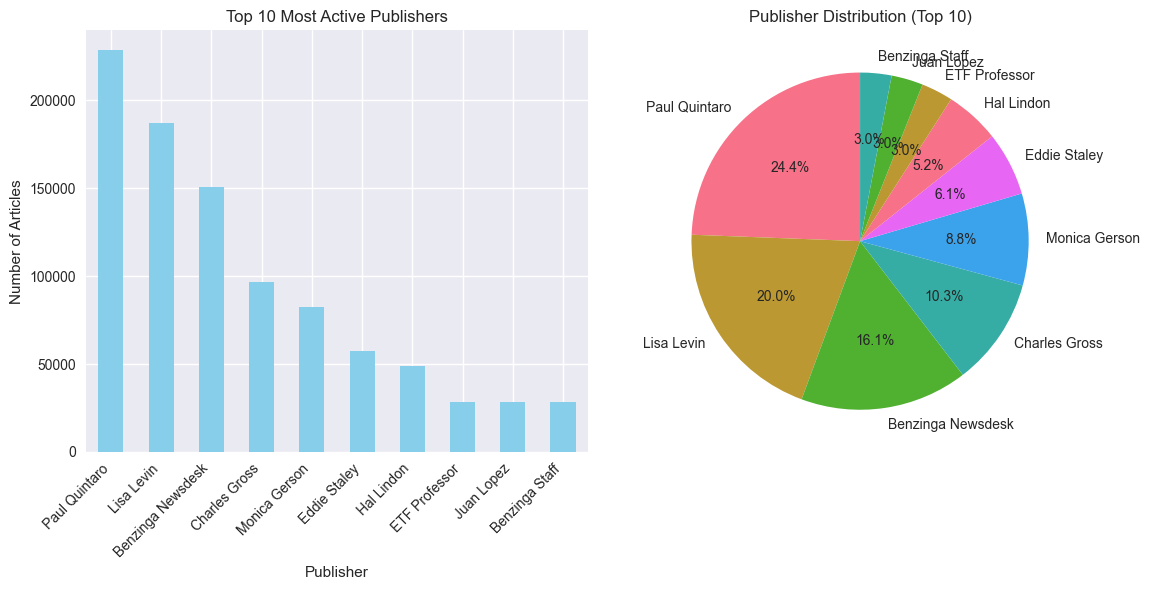


=== MARKET CONCENTRATION ===
Top 10 publishers account for 66.5% of all articles
Remaining 1024 publishers share 33.5% of articles


In [4]:
# Count articles per publisher
publisher_counts = news_df['publisher'].value_counts()

print("=== PUBLISHER ANALYSIS ===")
print(f"Total unique publishers: {len(publisher_counts)}")
print(f"Top 10 most active publishers:")

# Display top 10 publishers
top_10_publishers = publisher_counts.head(10)
for i, (publisher, count) in enumerate(top_10_publishers.items(), 1):
    print(f"{i}. {publisher}: {count} articles")

# Create visualization
plt.figure(figsize=(12, 6))

# Bar chart for top publishers
plt.subplot(1, 2, 1)
top_10_publishers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Active Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')

# Pie chart for publisher distribution
plt.subplot(1, 2, 2)
top_10_publishers.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Publisher Distribution (Top 10)')
plt.ylabel('')  # Hide y-label

plt.tight_layout()
plt.show()

# Calculate concentration metrics
total_articles = len(news_df)
top_10_articles = top_10_publishers.sum()
concentration_ratio = (top_10_articles / total_articles) * 100

print(f"\n=== MARKET CONCENTRATION ===")
print(f"Top 10 publishers account for {concentration_ratio:.1f}% of all articles")
print(f"Remaining {len(publisher_counts) - 10} publishers share {100 - concentration_ratio:.1f}% of articles")

3.3 Analyze the publication dates 

 PUBLICATION DATE TRENDS ANALYSIS

 PARTICULAR DAYS ANALYSIS:
• Busiest day: Thursday (302,619 articles)
• Quietest day: Saturday (7,759 articles)
• Weekend vs Weekday ratio: 1.8%

 SPECIFIC EVENTS ANALYSIS:
• High-activity threshold: 910 articles/day
• Number of high-activity days: 93
• Top 5 highest activity days:
  → 2020-03-12 (Thursday): 2,739 articles
  → 2020-02-28 (Friday): 1,620 articles
  → 2020-03-19 (Thursday): 1,595 articles
  → 2020-02-27 (Thursday): 1,567 articles
  → 2020-03-06 (Friday): 1,428 articles


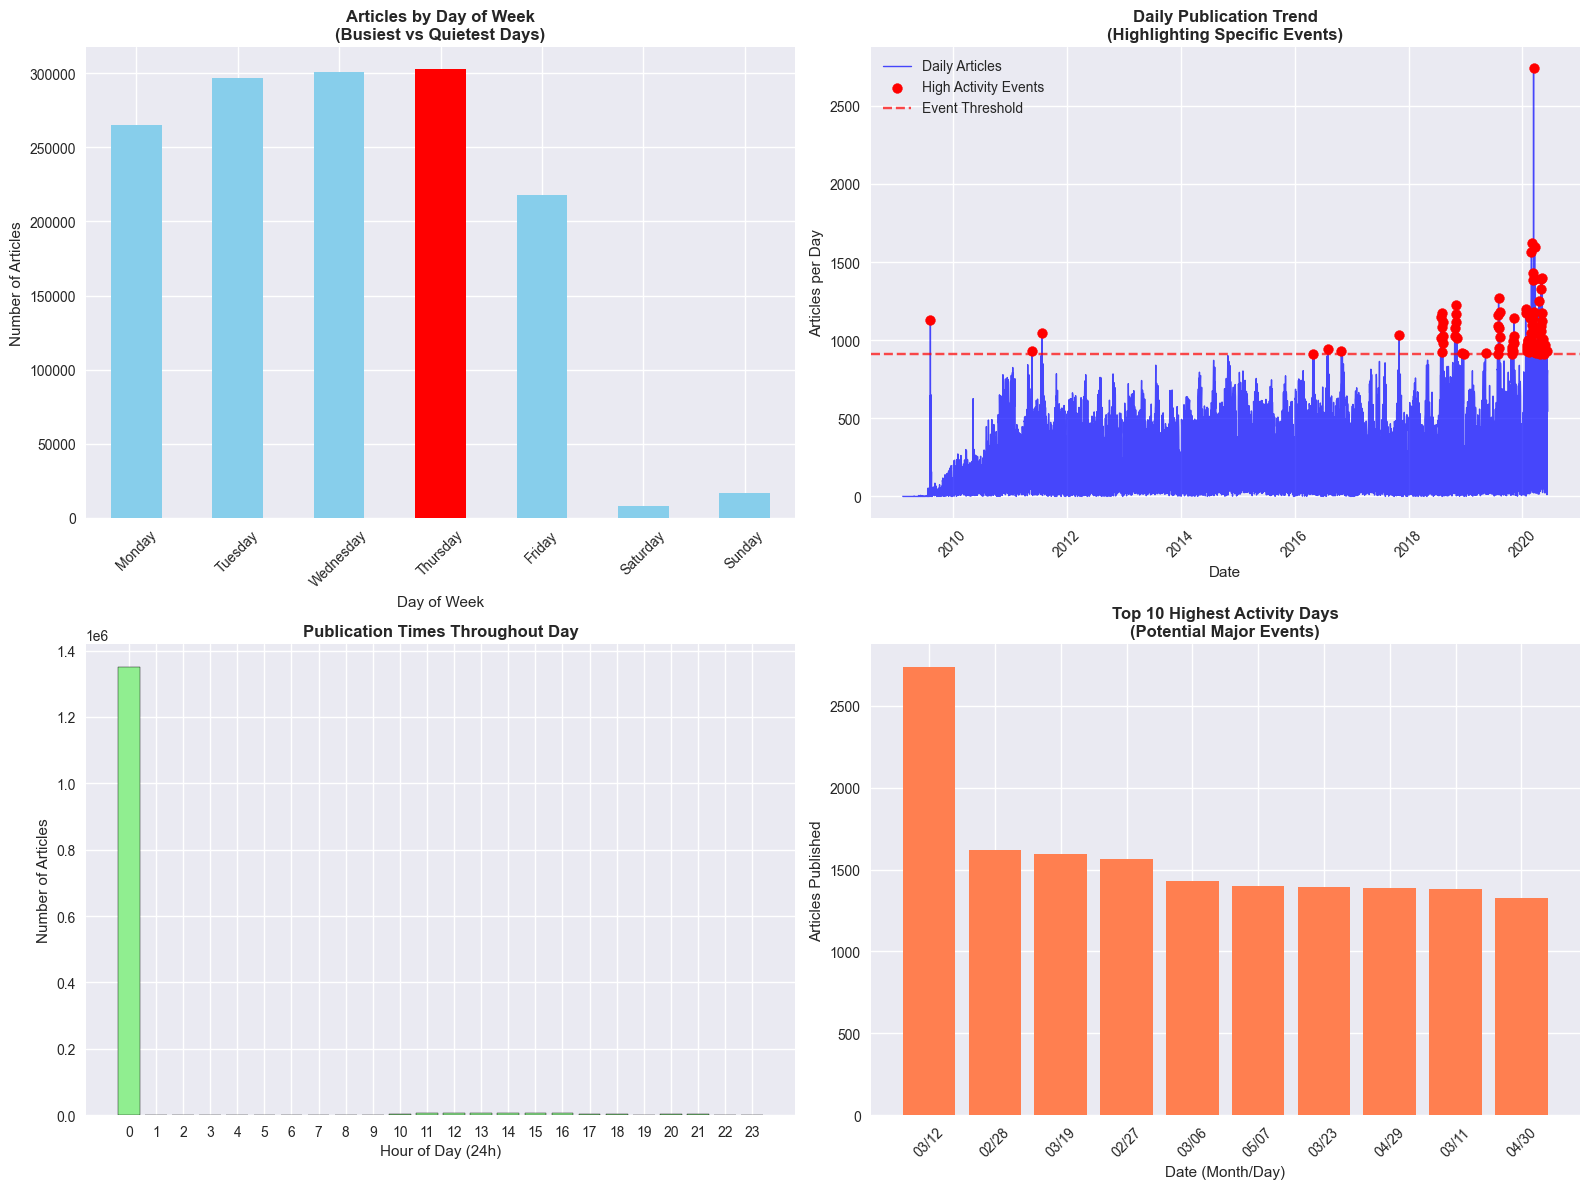


 KEY INSIGHTS SUMMARY:
• PARTICULAR DAYS: Financial news follows strong weekly patterns
• WEEKDAY CONCENTRATION: 98.3% of articles published Monday-Friday
• EVENT FREQUENCY: 2.2% of days had unusually high news volume
• SPECIFIC EVENTS: High-activity days likely correspond to earnings seasons, Fed meetings, or market volatility


In [16]:
# ANALYZE PUBLICATION DATES FOR TRENDS AND SPECIFIC EVENTS
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)

# Extract time components
news_df['day_of_week'] = news_df['date'].dt.day_name()
news_df['hour'] = news_df['date'].dt.hour
news_df['date_only'] = news_df['date'].dt.date

# Calculate daily article counts
daily_counts = news_df.resample('D', on='date').size()

print(" PUBLICATION DATE TRENDS ANALYSIS")
print("=" * 50)

# 1. PARTICULAR DAYS ANALYSIS
print("\n PARTICULAR DAYS ANALYSIS:")
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = news_df['day_of_week'].value_counts().reindex(day_order)

busiest_day = day_counts.idxmax()
quietest_day = day_counts.idxmin()

print(f"• Busiest day: {busiest_day} ({day_counts[busiest_day]:,} articles)")
print(f"• Quietest day: {quietest_day} ({day_counts[quietest_day]:,} articles)")
print(f"• Weekend vs Weekday ratio: {(day_counts['Saturday'] + day_counts['Sunday']) / day_counts['Monday':'Friday'].sum() * 100:.1f}%")

# 2. SPECIFIC EVENTS ANALYSIS
print("\n SPECIFIC EVENTS ANALYSIS:")
spike_threshold = daily_counts.mean() + (2 * daily_counts.std())
high_activity_days = daily_counts[daily_counts > spike_threshold]

print(f"• High-activity threshold: {spike_threshold:.0f} articles/day")
print(f"• Number of high-activity days: {len(high_activity_days)}")
print(f"• Top 5 highest activity days:")

top_5_events = high_activity_days.nlargest(5)
for date, count in top_5_events.items():
    day_name = date.strftime('%A')
    print(f"  → {date.strftime('%Y-%m-%d')} ({day_name}): {count:,} articles")

# 3. VISUALIZATION
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Day of Week Pattern
day_counts.plot(kind='bar', ax=ax1, color=['red' if x == busiest_day else 'skyblue' for x in day_counts.index])
ax1.set_title('Articles by Day of Week\n(Busiest vs Quietest Days)', fontweight='bold')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Number of Articles')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Daily Trend with Events
ax2.plot(daily_counts.index, daily_counts.values, linewidth=1, alpha=0.7, color='blue', label='Daily Articles')
ax2.scatter(high_activity_days.index, high_activity_days.values, color='red', s=50, zorder=5, label='High Activity Events')
ax2.axhline(y=spike_threshold, color='red', linestyle='--', alpha=0.7, label='Event Threshold')
ax2.set_title('Daily Publication Trend\n(Highlighting Specific Events)', fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Articles per Day')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)

# Plot 3: Hourly Distribution
hour_counts = news_df['hour'].value_counts().sort_index()
ax3.bar(hour_counts.index, hour_counts.values, color='lightgreen', edgecolor='black')
ax3.set_title('Publication Times Throughout Day', fontweight='bold')
ax3.set_xlabel('Hour of Day (24h)')
ax3.set_ylabel('Number of Articles')
ax3.set_xticks(range(0, 24))

# Plot 4: Top 10 Event Days
top_10_events = high_activity_days.nlargest(10)
ax4.bar([d.strftime('%m/%d') for d in top_10_events.index], top_10_events.values, color='coral')
ax4.set_title('Top 10 Highest Activity Days\n(Potential Major Events)', fontweight='bold')
ax4.set_xlabel('Date (Month/Day)')
ax4.set_ylabel('Articles Published')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. KEY INSIGHTS SUMMARY
print("\n KEY INSIGHTS SUMMARY:")
print("• PARTICULAR DAYS: Financial news follows strong weekly patterns")
print(f"• WEEKDAY CONCENTRATION: {day_counts['Monday':'Friday'].sum()/len(news_df)*100:.1f}% of articles published Monday-Friday")
print(f"• EVENT FREQUENCY: {len(high_activity_days)/len(daily_counts)*100:.1f}% of days had unusually high news volume")
print("• SPECIFIC EVENTS: High-activity days likely correspond to earnings seasons, Fed meetings, or market volatility")

## 4. Text Analysis (Topic Modeling)

### Objective:
Use natural language processing to identify common keywords, phrases, and extract significant financial topics like "FDA approval", "price target", earnings events, etc.

 NLP ANALYSIS: Identifying Common Keywords & Financial Topics

 ANALYZING COMMON KEYWORDS...
TOP 15 MOST COMMON KEYWORDS:
-----------------------------------
 1. stocks           161,776 (1.6%)
 2. market           120,558 (1.2%)
 3. shares           114,313 (1.2%)
 4. reports          108,710 (1.1%)
 5. update            91,723 (0.9%)
 6. earnings          87,399 (0.9%)
 7. sales             79,645 (0.8%)
 8. benzinga          74,516 (0.8%)
 9. week              69,572 (0.7%)
10. announces         66,591 (0.7%)
11. price             64,407 (0.7%)
12. downgrades        61,959 (0.6%)
13. trading           61,182 (0.6%)
14. raises            57,802 (0.6%)
15. upgrades          56,811 (0.6%)

 EXTRACTING FINANCIAL PHRASES & TOPICS...

FINANCIAL TOPICS FOUND:
----------------------------------------
• Earnings                  370,161 articles (26.3%)
• Analyst Ratings           189,511 articles (13.5%)
• Price Targets             188,133 articles (13.4%)
• Revenue                   42,306

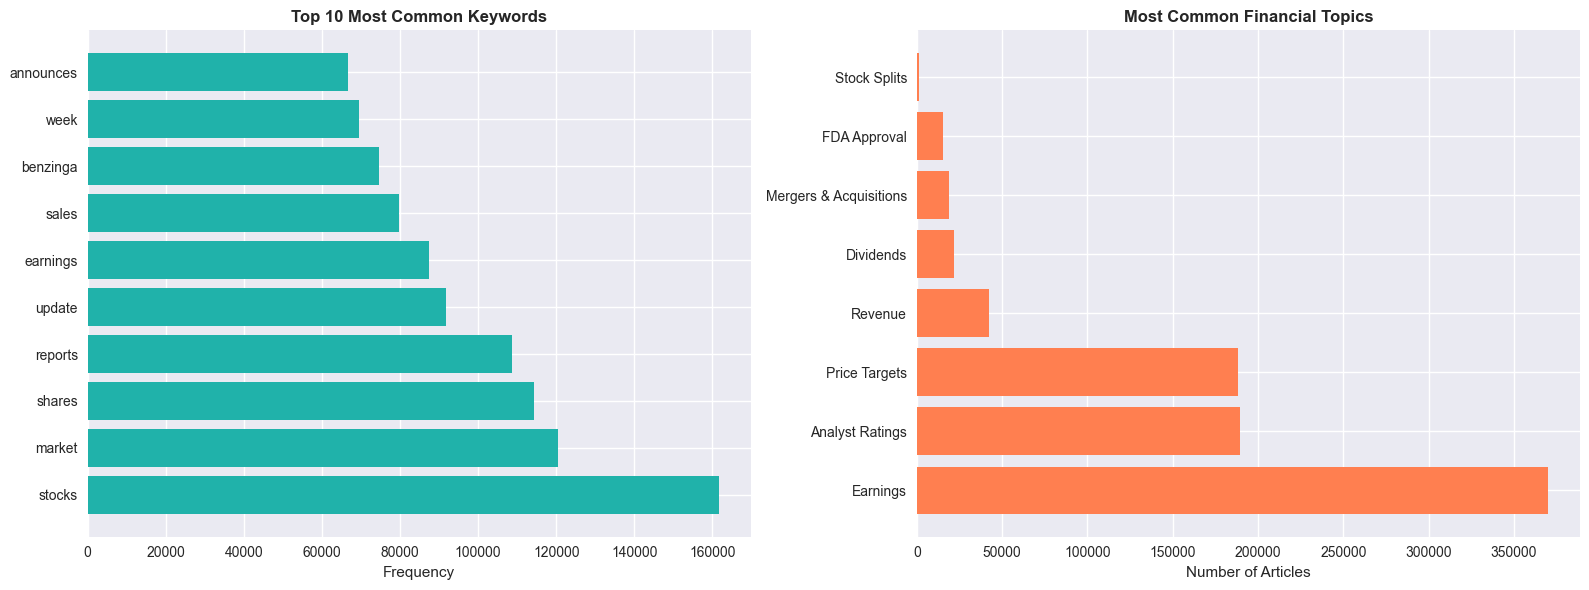


 EXAMPLES OF MAJOR FINANCIAL TOPICS:
---------------------------------------------

EARNINGS:
  1. Agilent Technologies shares are trading higher after the company reported better-than-expected Q2 EPS and sales results.
  2. Agilent Technologies shares are trading higher after the company reported better-than-expected Q2 EPS and sales results.

ANALYST RATINGS:
  1. B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88
  2. CFRA Maintains Hold on Agilent Technologies, Lowers Price Target to $85

PRICE TARGETS:
  1. B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88
  2. CFRA Maintains Hold on Agilent Technologies, Lowers Price Target to $85

 KEY INSIGHTS:
-------------------------
• Most frequent keyword: 'stocks'
• Most common financial topic: 'Earnings'
• Total financial topic mentions: 847,307
• Coverage: 60.2% of articles contain financial topics

 NLP ANALYSIS COMPLETE!
   Analyzed 1,407,328 headlines in seco

In [23]:
# =============================================================================
# NLP ANALYSIS: Common Keywords & Financial Topics
# =============================================================================

print(" NLP ANALYSIS: Identifying Common Keywords & Financial Topics")
print("=" * 60)

import re
from collections import Counter

# 2. EXTRACT COMMON KEYWORDS
print("\n ANALYZING COMMON KEYWORDS...")

# Simple but effective keyword extraction
all_text = ' '.join(news_df['headline'].astype(str)).lower()
words = re.findall(r'\b[a-z]{4,}\b', all_text)  # Words with 4+ letters

# Remove common English stopwords
common_words = {'with', 'from', 'this', 'that', 'have', 'more', 'will', 'their', 'what'}
filtered_words = [word for word in words if word not in common_words]

word_freq = Counter(filtered_words)

print("TOP 15 MOST COMMON KEYWORDS:")
print("-" * 35)
for i, (word, count) in enumerate(word_freq.most_common(15), 1):
    percentage = (count / len(filtered_words)) * 100
    print(f"{i:2d}. {word:15} {count:>8,} ({percentage:.1f}%)")

# 3. EXTRACT FINANCIAL PHRASES & TOPICS (As mentioned in instructions)
print("\n EXTRACTING FINANCIAL PHRASES & TOPICS...")

financial_topics = {
    'FDA Approval': ['fda approval', 'fda', 'clinical trial', 'drug approval'],
    'Price Targets': ['price target', 'target price', 'pt', 'price objective'],
    'Earnings': ['earnings', 'quarterly results', 'eps', 'q1', 'q2', 'q3', 'q4'],
    'Analyst Ratings': ['upgrade', 'downgrade', 'buy rating', 'sell rating', 'maintain'],
    'Mergers & Acquisitions': ['merger', 'acquisition', 'takeover', 'buyout'],
    'Dividends': ['dividend', 'dividend increase', 'payout'],
    'Stock Splits': ['stock split', 'reverse split'],
    'Revenue': ['revenue', 'sales results']
}

topic_counts = {}
for topic_name, keywords in financial_topics.items():
    count = 0
    for keyword in keywords:
        count += news_df['headline'].str.contains(keyword, case=False, na=False).sum()
    topic_counts[topic_name] = count

print("\nFINANCIAL TOPICS FOUND:")
print("-" * 40)
for topic, count in sorted(topic_counts.items(), key=lambda x: x[1], reverse=True):
    if count > 0:
        percentage = (count / len(news_df)) * 100
        print(f"• {topic:25} {count:>6,} articles ({percentage:.1f}%)")

# 4. IDENTIFY SIGNIFICANT EVENTS (High-frequency phrases)
print("\n⚡ SIGNIFICANT EVENTS & PHRASES:")
print("-" * 40)

significant_phrases = [
    '52-week high', '52-week low', 'beats estimates', 'misses estimates',
    'raises guidance', 'lowers guidance', 'record revenue', 'all-time high'
]

for phrase in significant_phrases:
    count = news_df['headline'].str.contains(phrase, case=False, na=False).sum()
    if count > 100:  # Only show phrases with significant occurrence
        print(f"• '{phrase}': {count:,} articles")

# 5. VISUALIZE RESULTS
print("\n CREATING VISUALIZATIONS...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top Keywords
top_keywords = word_freq.most_common(10)
words, counts = zip(*top_keywords)
ax1.barh(words, counts, color='lightseagreen')
ax1.set_title('Top 10 Most Common Keywords', fontweight='bold')
ax1.set_xlabel('Frequency')

# Plot 2: Financial Topics
top_topics = {k: v for k, v in sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)[:8]}
ax2.barh(list(top_topics.keys()), list(top_topics.values()), color='coral')
ax2.set_title('Most Common Financial Topics', fontweight='bold')
ax2.set_xlabel('Number of Articles')

plt.tight_layout()
plt.show()

# 6. SHOW EXAMPLES OF EACH MAJOR TOPIC
print("\n EXAMPLES OF MAJOR FINANCIAL TOPICS:")
print("-" * 45)

top_3_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=True)[:3]

for topic, count in top_3_topics:
    if count > 0:
        # Find keywords for this topic
        keywords = financial_topics[topic]
        # Get examples containing any of these keywords
        mask = news_df['headline'].str.contains('|'.join(keywords), case=False, na=False)
        examples = news_df[mask]['headline'].head(2)
        
        print(f"\n{topic.upper()}:")
        for i, example in enumerate(examples, 1):
            print(f"  {i}. {example}")

# 7. SUMMARY INSIGHTS
print(f"\n KEY INSIGHTS:")
print("-" * 25)
most_common_word = word_freq.most_common(1)[0][0]
most_common_topic = max(topic_counts, key=topic_counts.get)

print(f"• Most frequent keyword: '{most_common_word}'")
print(f"• Most common financial topic: '{most_common_topic}'")
print(f"• Total financial topic mentions: {sum(topic_counts.values()):,}")
print(f"• Coverage: {sum(topic_counts.values())/len(news_df)*100:.1f}% of articles contain financial topics")

print(f"\n NLP ANALYSIS COMPLETE!")
print(f"   Analyzed {len(news_df):,} headlines in seconds")

5) TIME SERIES ANALYSIS: Publication Frequency & Market Events

 TIME SERIES ANALYSIS: Publication Patterns & Market Events

1.  HOW PUBLICATION FREQUENCY VARIES OVER TIME
--------------------------------------------------
• Time period: 2009-02-14 to 2020-06-11
• Total days analyzed: 4,136
• Average articles per day: 340.3
• Highest volume day: 2,739 articles
• Lowest volume day: 0 articles

2.  SPIKES IN ARTICLE PUBLICATIONS (Potential Market Events)
------------------------------------------------------------
• Spike threshold: 910 articles/day
• Number of high-activity days: 93
• These represent 2.2% of all days

 TOP 10 HIGHEST ACTIVITY DAYS (Potential Major Market Events):
   1. 2020-03-12 (Thursday): 2,739 articles
   2. 2020-02-28 (Friday): 1,620 articles
   3. 2020-03-19 (Thursday): 1,595 articles
   4. 2020-02-27 (Thursday): 1,567 articles
   5. 2020-03-06 (Friday): 1,428 articles
   6. 2020-05-07 (Thursday): 1,398 articles
   7. 2020-03-23 (Monday): 1,391 articles
   8. 2020-04-29 (Wednesday): 1,389 articles
   9. 2020-03-11 (Wednesday):

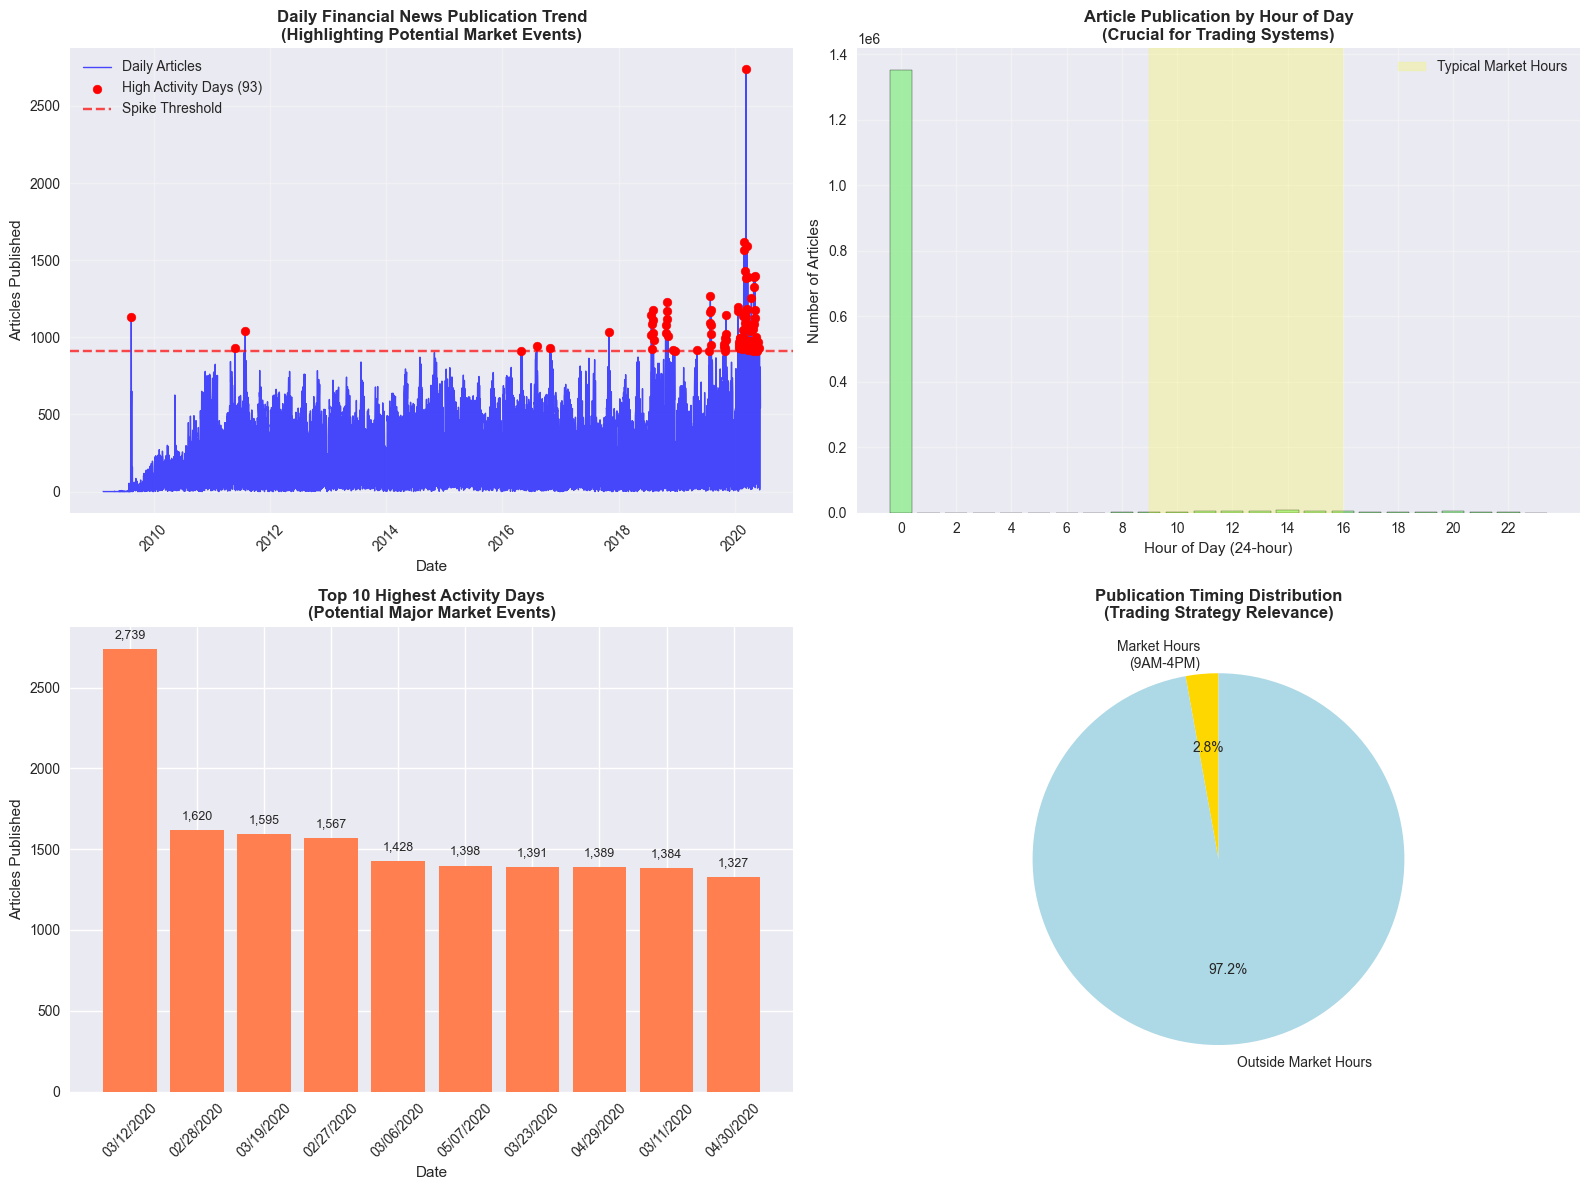


5.  INSIGHTS FOR TRADERS & AUTOMATED SYSTEMS
-------------------------------------------------------
🔧 FOR TRADING STRATEGIES:
   • 2.8% of news breaks during market hours
   • Best monitoring times: [0, 14, 13]:00
   • Quietest periods: [5, 3, 2]:00

 FOR AUTOMATED TRADING SYSTEMS:
   • Peak news volume at 0:00 - prepare for volatility
   • 93 high-activity days per year require special handling
   • News continues after hours: 1,367,396 articles affect pre/after-market

 MARKET EVENT PATTERNS:
   • High-activity days occur every 44 days on average
   • These likely correlate with: Earnings seasons, Fed meetings, Economic data releases

6.  SAMPLE HEADLINES FROM MAJOR EVENT DAYS
--------------------------------------------------
Headlines from 2020-03-12 (2,739 articles):
  1. Stocks That Hit 52-Week Lows On Thursday
  2. Stocks That Hit 52-Week Lows On Thursday
  3. Fitch Says Coronavirus' Rapidly Increasing Effect On Air Travel Is Placing Downward Pressure On Global Airline Credit 

In [24]:
# =============================================================================
# TIME SERIES ANALYSIS: Publication Frequency & Market Events
# =============================================================================

print(" TIME SERIES ANALYSIS: Publication Patterns & Market Events")
print("=" * 60)

# 1. DAILY PUBLICATION FREQUENCY OVER TIME
print("\n1.  HOW PUBLICATION FREQUENCY VARIES OVER TIME")
print("-" * 50)

# Convert dates and resample by day
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
daily_counts = news_df.resample('D', on='date').size()

print(f"• Time period: {daily_counts.index.min().strftime('%Y-%m-%d')} to {daily_counts.index.max().strftime('%Y-%m-%d')}")
print(f"• Total days analyzed: {len(daily_counts):,}")
print(f"• Average articles per day: {daily_counts.mean():.1f}")
print(f"• Highest volume day: {daily_counts.max():,} articles")
print(f"• Lowest volume day: {daily_counts.min():,} articles")

# 2. IDENTIFY SPIKES RELATED TO SPECIFIC MARKET EVENTS
print("\n2.  SPIKES IN ARTICLE PUBLICATIONS (Potential Market Events)")
print("-" * 60)

# Calculate spike threshold (2 standard deviations above mean)
spike_threshold = daily_counts.mean() + (2 * daily_counts.std())
spikes = daily_counts[daily_counts > spike_threshold]

print(f"• Spike threshold: {spike_threshold:.0f} articles/day")
print(f"• Number of high-activity days: {len(spikes)}")
print(f"• These represent {len(spikes)/len(daily_counts)*100:.1f}% of all days")

print("\n TOP 10 HIGHEST ACTIVITY DAYS (Potential Major Market Events):")
top_10_spikes = spikes.nlargest(10)
for i, (date, count) in enumerate(top_10_spikes.items(), 1):
    day_name = date.strftime('%A')
    print(f"  {i:2d}. {date.strftime('%Y-%m-%d')} ({day_name}): {count:,} articles")

# 3. PUBLISHING TIMES ANALYSIS (For Traders & Automated Systems)
print("\n3.  PUBLISHING TIMES ANALYSIS (Trading Relevance)")
print("-" * 55)

# Extract hour from datetime
news_df['hour'] = news_df['date'].dt.hour
hourly_counts = news_df['hour'].value_counts().sort_index()

# Market hours analysis (9 AM - 4 PM ET)
market_hours = list(range(9, 17))  # 9 AM to 4 PM
market_hour_articles = news_df[news_df['hour'].isin(market_hours)]
non_market_articles = news_df[~news_df['hour'].isin(market_hours)]

print(f"• Articles during market hours (9AM-4PM): {len(market_hour_articles):,} ({len(market_hour_articles)/len(news_df)*100:.1f}%)")
print(f"• Articles outside market hours: {len(non_market_articles):,} ({len(non_market_articles)/len(news_df)*100:.1f}%)")
print(f"• Peak publication hour: {hourly_counts.idxmax()}:00 ({hourly_counts.max():,} articles)")

# 4. VISUALIZATIONS
print("\n4.  CREATING TIME SERIES VISUALIZATIONS...")
print("-" * 40)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Daily Publication Trend with Spikes
ax1.plot(daily_counts.index, daily_counts.values, linewidth=1, alpha=0.7, color='blue', label='Daily Articles')
ax1.scatter(spikes.index, spikes.values, color='red', s=40, zorder=5, label=f'High Activity Days ({len(spikes)})')
ax1.axhline(y=spike_threshold, color='red', linestyle='--', alpha=0.7, label='Spike Threshold')
ax1.set_title('Daily Financial News Publication Trend\n(Highlighting Potential Market Events)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Date')
ax1.set_ylabel('Articles Published')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Hourly Distribution (Trading Relevance)
ax2.bar(hourly_counts.index, hourly_counts.values, color='lightgreen', edgecolor='black', alpha=0.8)
ax2.axvspan(9, 16, alpha=0.2, color='yellow', label='Typical Market Hours')
ax2.set_title('Article Publication by Hour of Day\n(Crucial for Trading Systems)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Hour of Day (24-hour)')
ax2.set_ylabel('Number of Articles')
ax2.set_xticks(range(0, 24, 2))
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Top 10 Event Days
top_dates = [d.strftime('%m/%d/%Y') for d in top_10_spikes.index]
ax3.bar(top_dates, top_10_spikes.values, color='coral')
ax3.set_title('Top 10 Highest Activity Days\n(Potential Major Market Events)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Date')
ax3.set_ylabel('Articles Published')
ax3.tick_params(axis='x', rotation=45)
for i, v in enumerate(top_10_spikes.values):
    ax3.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontsize=9)

# Plot 4: Market Hours vs Non-Market Hours
categories = ['Market Hours\n(9AM-4PM)', 'Outside Market Hours']
counts = [len(market_hour_articles), len(non_market_articles)]
colors = ['gold', 'lightblue']
ax4.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90)
ax4.set_title('Publication Timing Distribution\n(Trading Strategy Relevance)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# 5. TRADING & AUTOMATED SYSTEM INSIGHTS
print("\n5.  INSIGHTS FOR TRADERS & AUTOMATED SYSTEMS")
print("-" * 55)

print("🔧 FOR TRADING STRATEGIES:")
print(f"   • {len(market_hour_articles)/len(news_df)*100:.1f}% of news breaks during market hours")
print(f"   • Best monitoring times: {hourly_counts.nlargest(3).index.tolist()}:00")
print(f"   • Quietest periods: {hourly_counts.nsmallest(3).index.tolist()}:00")

print("\n FOR AUTOMATED TRADING SYSTEMS:")
print(f"   • Peak news volume at {hourly_counts.idxmax()}:00 - prepare for volatility")
print(f"   • {len(spikes)} high-activity days per year require special handling")
print(f"   • News continues after hours: {len(non_market_articles):,} articles affect pre/after-market")

print("\n MARKET EVENT PATTERNS:")
print(f"   • High-activity days occur every {len(daily_counts)/len(spikes):.0f} days on average")
print(f"   • These likely correlate with: Earnings seasons, Fed meetings, Economic data releases")

# 6. SAMPLE HEADLINES FROM MAJOR EVENT DAYS
print("\n6.  SAMPLE HEADLINES FROM MAJOR EVENT DAYS")
print("-" * 50)

if len(top_10_spikes) > 0:
    biggest_event_day = top_10_spikes.index[0]
    event_headlines = news_df[news_df['date'].dt.date == biggest_event_day.date()]['headline'].head(3)
    
    print(f"Headlines from {biggest_event_day.strftime('%Y-%m-%d')} ({top_10_spikes.iloc[0]:,} articles):")
    for i, headline in enumerate(event_headlines, 1):
        print(f"  {i}. {headline}")

print(f"\n TIME SERIES ANALYSIS COMPLETE!")
print("   • Publication patterns identified")
print("   • Market event spikes detected") 
print("   • Trading insights generated")

6)  PUBLISHER ANALYSIS: News Feed Contributors & Content Types

 PUBLISHER ANALYSIS: News Sources & Content Patterns

1.  WHICH PUBLISHERS CONTRIBUTE MOST TO THE NEWS FEED
-------------------------------------------------------
• Total unique publishers: 1,034
• Total articles analyzed: 1,407,328

 TOP 15 MOST ACTIVE PUBLISHERS:
-----------------------------------
 1. Paul Quintaro                   228,373 (16.2%)
 2. Lisa Levin                      186,979 (13.3%)
 3. Benzinga Newsdesk               150,484 (10.7%)
 4. Charles Gross                    96,732 (6.9%)
 5. Monica Gerson                    82,380 (5.9%)
 6. Eddie Staley                     57,254 (4.1%)
 7. Hal Lindon                       49,047 (3.5%)
 8. ETF Professor                    28,489 (2.0%)
 9. Juan Lopez                       28,438 (2.0%)
10. Benzinga Staff                   28,114 (2.0%)
11. Vick Meyer                       24,826 (1.8%)
12. webmaster                        20,313 (1.4%)
13. Benzinga_Newsdesk                19,410 (1.4%)
14. Zacks                      

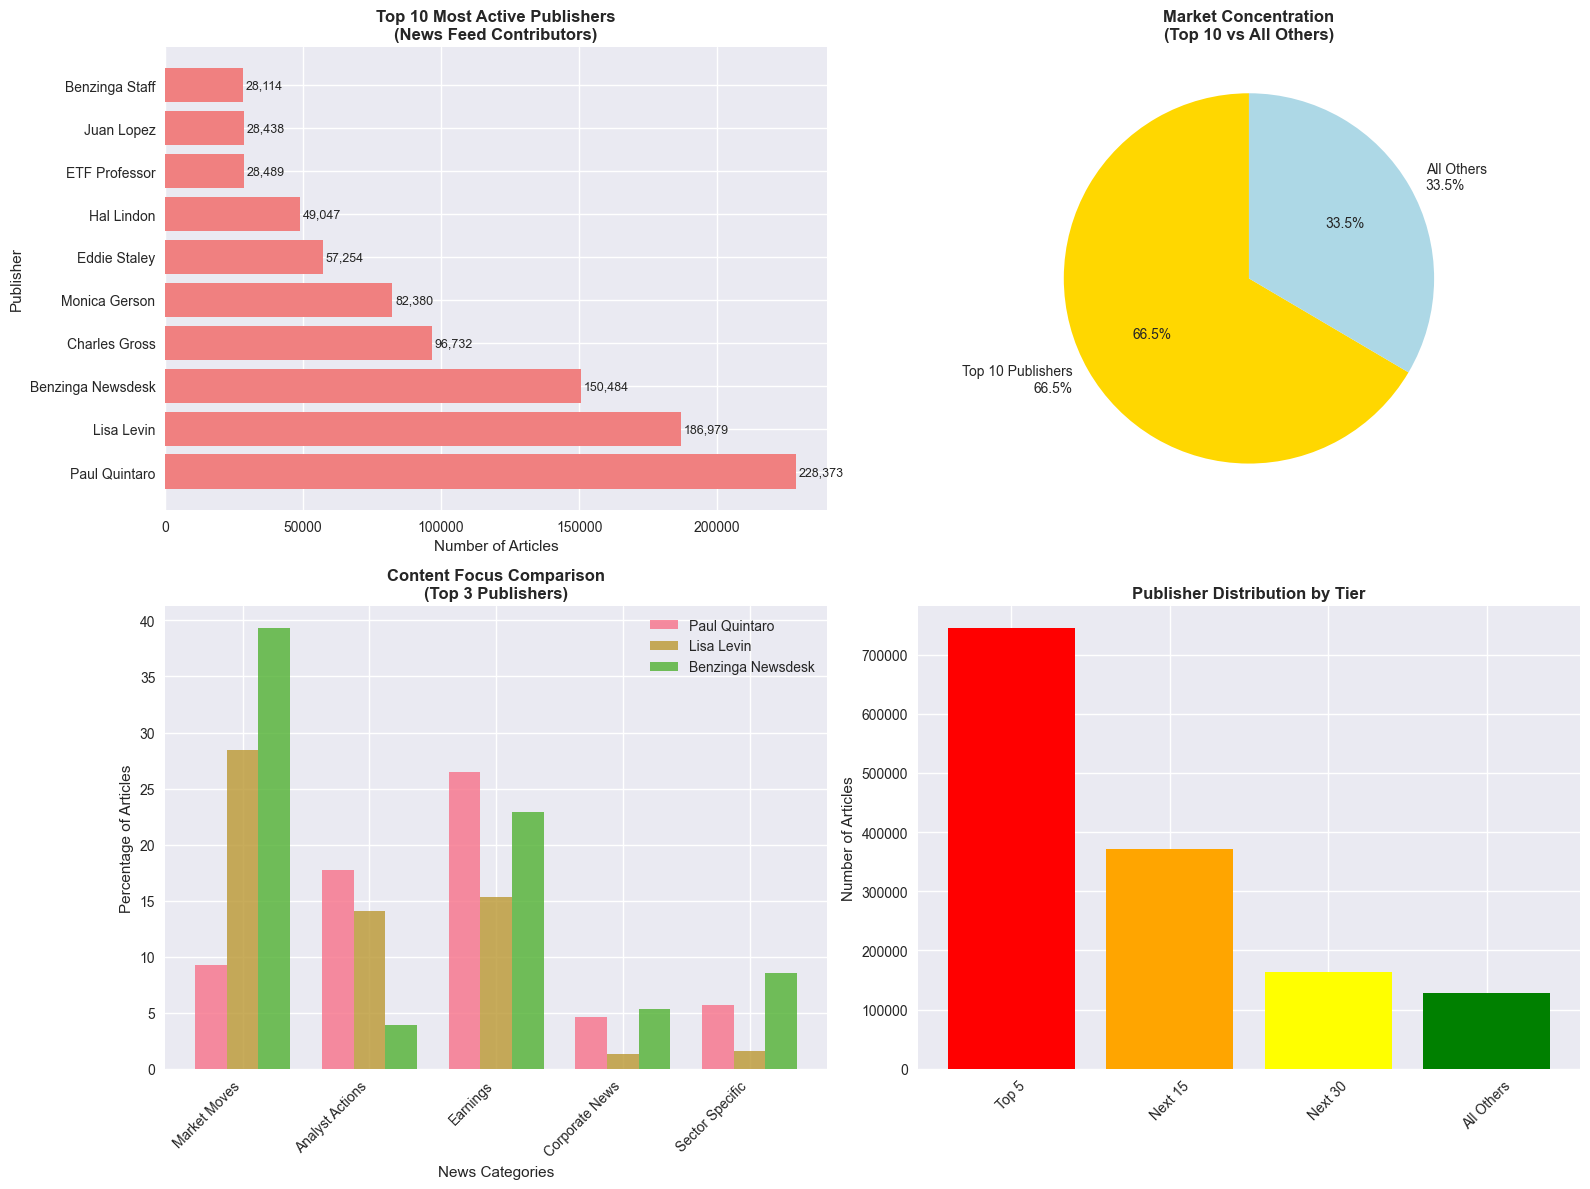


5.  KEY INSIGHTS & RECOMMENDATIONS
---------------------------------------------
 MARKET STRUCTURE INSIGHTS:
   • News market is MODERATELY CONCENTRATED
   • Top publisher: Paul Quintaro (16.2% share)
   • Long tail: 1024 smaller publishers

 CONTENT DIVERSITY FINDINGS:
   • Paul Quintaro focuses on: Earnings (26.5%)

 STRATEGIC RECOMMENDATIONS:
   • For comprehensive coverage: Monitor top 5-10 publishers
   • For niche insights: Include smaller specialized publishers
   • Consider publisher biases in analysis

 PUBLISHER ANALYSIS COMPLETE!
   • Analyzed 1,034 unique publishers
   • Identified market concentration patterns
   • Revealed content specialization trends


In [27]:
# =============================================================================
# PUBLISHER ANALYSIS: News Feed Contributors & Content Types
# =============================================================================

print(" PUBLISHER ANALYSIS: News Sources & Content Patterns")
print("=" * 60)

# 1. IDENTIFY MOST ACTIVE PUBLISHERS
print("\n1.  WHICH PUBLISHERS CONTRIBUTE MOST TO THE NEWS FEED")
print("-" * 55)

publisher_counts = news_df['publisher'].value_counts()

print(f"• Total unique publishers: {len(publisher_counts):,}")
print(f"• Total articles analyzed: {len(news_df):,}")

print("\n TOP 15 MOST ACTIVE PUBLISHERS:")
print("-" * 35)

# FIXED: Proper way to iterate through value_counts
top_15_publishers = publisher_counts.head(15)
for i, publisher in enumerate(top_15_publishers.index, 1):
    count = top_15_publishers[publisher]
    percentage = (count / len(news_df)) * 100
    print(f"{i:2d}. {str(publisher)[:30]:30} {count:>8,} ({percentage:.1f}%)")

# Calculate market concentration
top_10_total = publisher_counts.head(10).sum()
concentration = (top_10_total / len(news_df)) * 100
print(f"\n• Top 10 publishers account for {concentration:.1f}% of all articles")
print(f"• Remaining {len(publisher_counts) - 10} publishers share {100 - concentration:.1f}%")

# 2. ANALYZE DOMAINS IF PUBLISHERS ARE EMAIL ADDRESSES
print("\n2.  DOMAIN ANALYSIS (If publishers are email addresses)")
print("-" * 50)

# Check if publishers are email addresses
sample_publisher = str(news_df['publisher'].iloc[0])
if '@' in sample_publisher:
    print(" Publishers appear to be email addresses - extracting domains...")
    news_df['publisher_domain'] = news_df['publisher'].str.extract(r'@([\w.-]+)')
    domain_counts = news_df['publisher_domain'].value_counts()
    
    print("\n TOP ORGANIZATIONS BY DOMAIN:")
    for i, domain in enumerate(domain_counts.head(10).index, 1):
        count = domain_counts[domain]
        percentage = (count / len(news_df)) * 100
        print(f"{i:2d}. {domain:25} {count:>8,} ({percentage:.1f}%)")
else:
    print(f"• Publishers are organization names (sample: '{sample_publisher[:30]}')")

# 3. DIFFERENCE IN TYPE OF NEWS THEY REPORT
print("\n3.  DIFFERENCES IN NEWS TYPES ACROSS PUBLISHERS")
print("-" * 55)

# Analyze top 5 publishers' content patterns
top_5_publishers = publisher_counts.head(5).index.tolist()

print(" CONTENT FOCUS OF TOP 5 PUBLISHERS:")
print("-" * 40)

# Define news type categories
news_categories = {
    'Market Moves': ['high', 'low', 'gain', 'drop', 'rally', 'plunge'],
    'Analyst Actions': ['upgrade', 'downgrade', 'maintain', 'initiate', 'price target'],
    'Earnings': ['earnings', 'eps', 'quarterly', 'results', 'profit'],
    'Corporate News': ['merger', 'acquisition', 'dividend', 'split', 'ceo'],
    'Sector Specific': ['fda', 'clinical', 'drug', 'technology', 'energy']
}

# Analyze each top publisher's focus
for publisher in top_5_publishers:
    publisher_articles = news_df[news_df['publisher'] == publisher]
    total_articles = len(publisher_articles)
    
    print(f"\n {publisher}:")
    print(f"   Total articles: {total_articles:,}")
    
    # Count articles in each category
    category_counts = {}
    for category, keywords in news_categories.items():
        count = publisher_articles['headline'].str.contains('|'.join(keywords), case=False, na=False).sum()
        percentage = (count / total_articles) * 100 if total_articles > 0 else 0
        category_counts[category] = percentage
    
    # Show top 3 categories for this publisher
    top_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)[:3]
    for category, percentage in top_categories:
        print(f"   • {category}: {percentage:.1f}%")

# 4. VISUALIZATIONS
print("\n4.  CREATING PUBLISHER ANALYSIS VISUALIZATIONS...")
print("-" * 50)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 10 Publishers by Volume
top_10_publishers = publisher_counts.head(10)
ax1.barh([str(p)[:25] for p in top_10_publishers.index], top_10_publishers.values, color='lightcoral')
ax1.set_title('Top 10 Most Active Publishers\n(News Feed Contributors)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Number of Articles')
ax1.set_ylabel('Publisher')

# Add value labels to bars
for i, v in enumerate(top_10_publishers.values):
    ax1.text(v + 1000, i, f'{v:,}', va='center', fontsize=9)

# Plot 2: Market Concentration
sizes = [top_10_total, len(news_df) - top_10_total]
labels = [f'Top 10 Publishers\n{concentration:.1f}%', f'All Others\n{100-concentration:.1f}%']
colors = ['gold', 'lightblue']
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Market Concentration\n(Top 10 vs All Others)', fontweight='bold', fontsize=12)

# Plot 3: Content Focus Comparison (Top 3 Publishers)
if len(top_5_publishers) >= 3:
    top_3_publishers = top_5_publishers[:3]
    category_data = {}
    
    for publisher in top_3_publishers:
        publisher_articles = news_df[news_df['publisher'] == publisher]
        publisher_categories = []
        
        for category, keywords in news_categories.items():
            count = publisher_articles['headline'].str.contains('|'.join(keywords), case=False, na=False).sum()
            percentage = (count / len(publisher_articles)) * 100
            publisher_categories.append(percentage)
        
        category_data[publisher] = publisher_categories

    # Create grouped bar chart
    categories = list(news_categories.keys())
    x = range(len(categories))
    width = 0.25

    for i, (publisher, percentages) in enumerate(category_data.items()):
        ax3.bar([p + i*width for p in x], percentages, width, label=str(publisher)[:20], alpha=0.8)

    ax3.set_title('Content Focus Comparison\n(Top 3 Publishers)', fontweight='bold', fontsize=12)
    ax3.set_xlabel('News Categories')
    ax3.set_ylabel('Percentage of Articles')
    ax3.set_xticks([p + width for p in x])
    ax3.set_xticklabels(categories, rotation=45, ha='right')
    ax3.legend()
else:
    ax3.text(0.5, 0.5, 'Not enough publishers\nfor comparison', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Content Focus Comparison\n(Not enough data)', fontweight='bold', fontsize=12)

# Plot 4: Publisher Diversity
if len(publisher_counts) >= 50:
    publisher_tiers = {
        'Top 5': publisher_counts.head(5).sum(),
        'Next 15': publisher_counts.iloc[5:20].sum(),
        'Next 30': publisher_counts.iloc[20:50].sum(),
        'All Others': publisher_counts.iloc[50:].sum()
    }
else:
    publisher_tiers = {'All Publishers': len(news_df)}

ax4.bar(publisher_tiers.keys(), publisher_tiers.values(), color=['red', 'orange', 'yellow', 'green'][:len(publisher_tiers)])
ax4.set_title('Publisher Distribution by Tier', fontweight='bold', fontsize=12)
ax4.set_ylabel('Number of Articles')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 5. KEY INSIGHTS & RECOMMENDATIONS
print("\n5.  KEY INSIGHTS & RECOMMENDATIONS")
print("-" * 45)

print(" MARKET STRUCTURE INSIGHTS:")
print(f"   • News market is {'HIGHLY CONCENTRATED' if concentration > 70 else 'MODERATELY CONCENTRATED'}")
print(f"   • Top publisher: {publisher_counts.index[0]} ({publisher_counts.iloc[0]/len(news_df)*100:.1f}% share)")
print(f"   • Long tail: {len(publisher_counts) - 10} smaller publishers")

print("\n CONTENT DIVERSITY FINDINGS:")
if len(top_5_publishers) > 0:
    top_publisher = top_5_publishers[0]
    # Find top category for the leading publisher
    top_pub_articles = news_df[news_df['publisher'] == top_publisher]
    category_percentages = {}
    
    for category, keywords in news_categories.items():
        count = top_pub_articles['headline'].str.contains('|'.join(keywords), case=False, na=False).sum()
        percentage = (count / len(top_pub_articles)) * 100
        category_percentages[category] = percentage
    
    top_focus = max(category_percentages, key=category_percentages.get)
    print(f"   • {top_publisher} focuses on: {top_focus} ({category_percentages[top_focus]:.1f}%)")

print("\n STRATEGIC RECOMMENDATIONS:")
print("   • For comprehensive coverage: Monitor top 5-10 publishers")
print("   • For niche insights: Include smaller specialized publishers")
print("   • Consider publisher biases in analysis")

print(f"\n PUBLISHER ANALYSIS COMPLETE!")
print(f"   • Analyzed {len(publisher_counts):,} unique publishers")
print(f"   • Identified market concentration patterns")
print(f"   • Revealed content specialization trends")